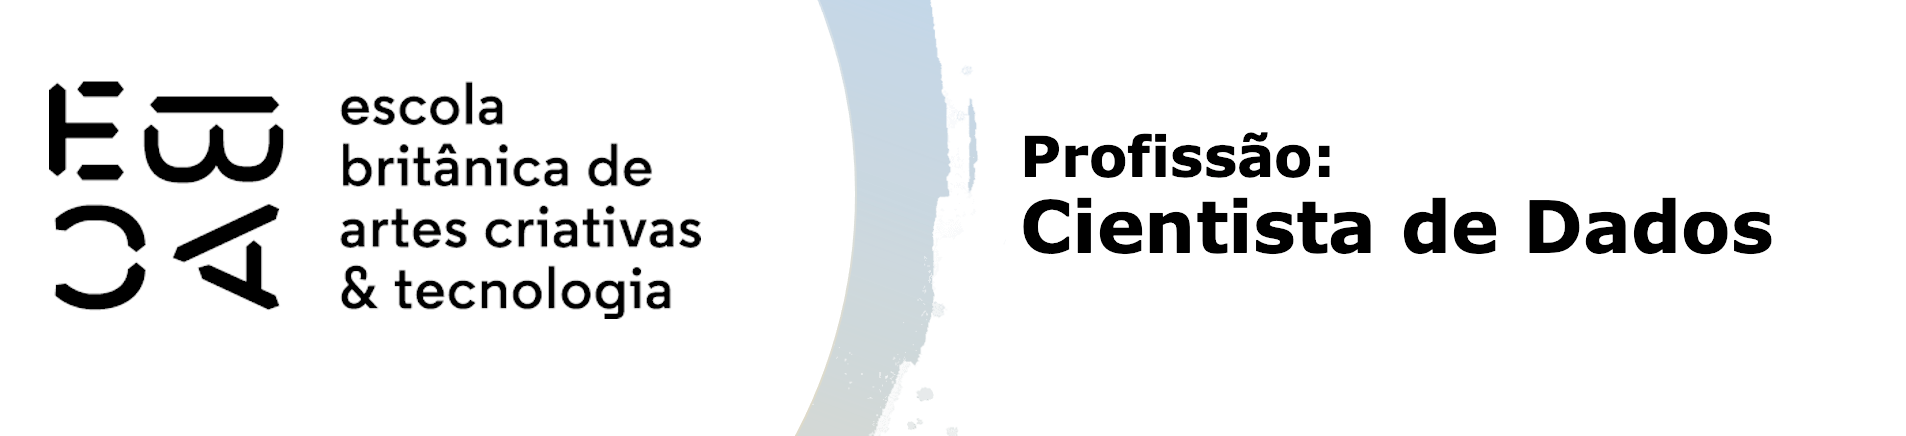

# Métodos hierárquicos de agrupamento - Tarefa

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [56]:
#carregamento e limpeza de dados
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

#padronizando dados
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

#definindo o objeto de agrupamento
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
#treinando o algoritmo
clus.fit(peng_pad)


AgglomerativeClustering(linkage='complete', n_clusters=3)

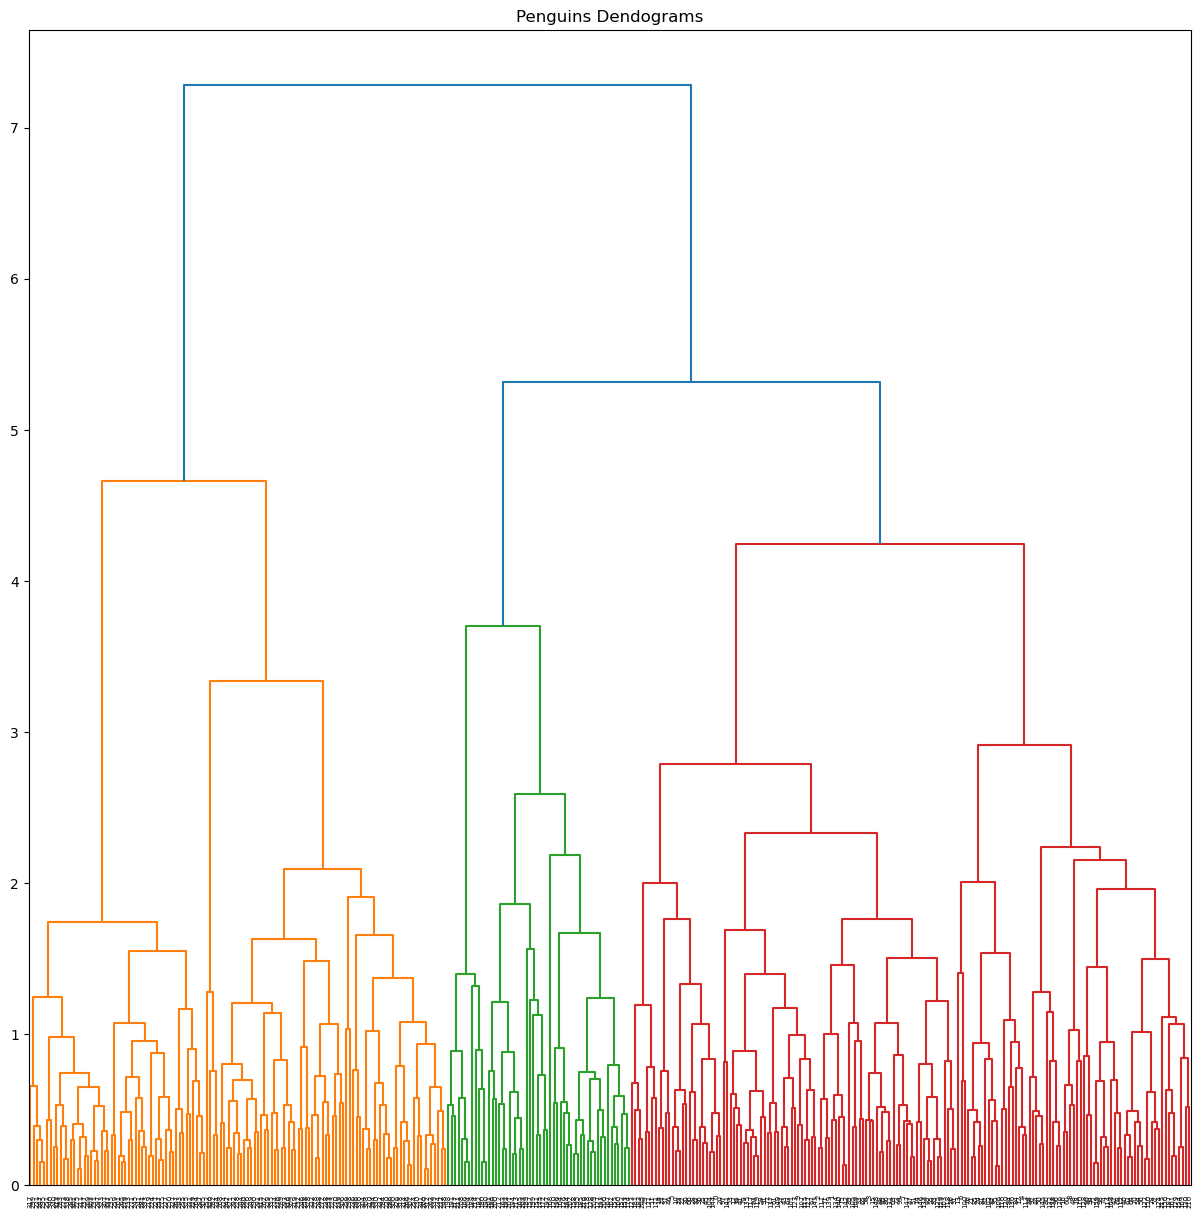

In [58]:
#dendograma
plt.figure(figsize=(15, 15))

plt.title("Penguins Dendograms")

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?


In [60]:
# colocando grupo no dataframe original
peng_num['grupo_3'] = clus.labels_
peng = peng.merge(peng_num['grupo_3'], how='left', on='id')

#crosstab
pd.crosstab(peng['species'], peng['grupo_3'])

grupo_3,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

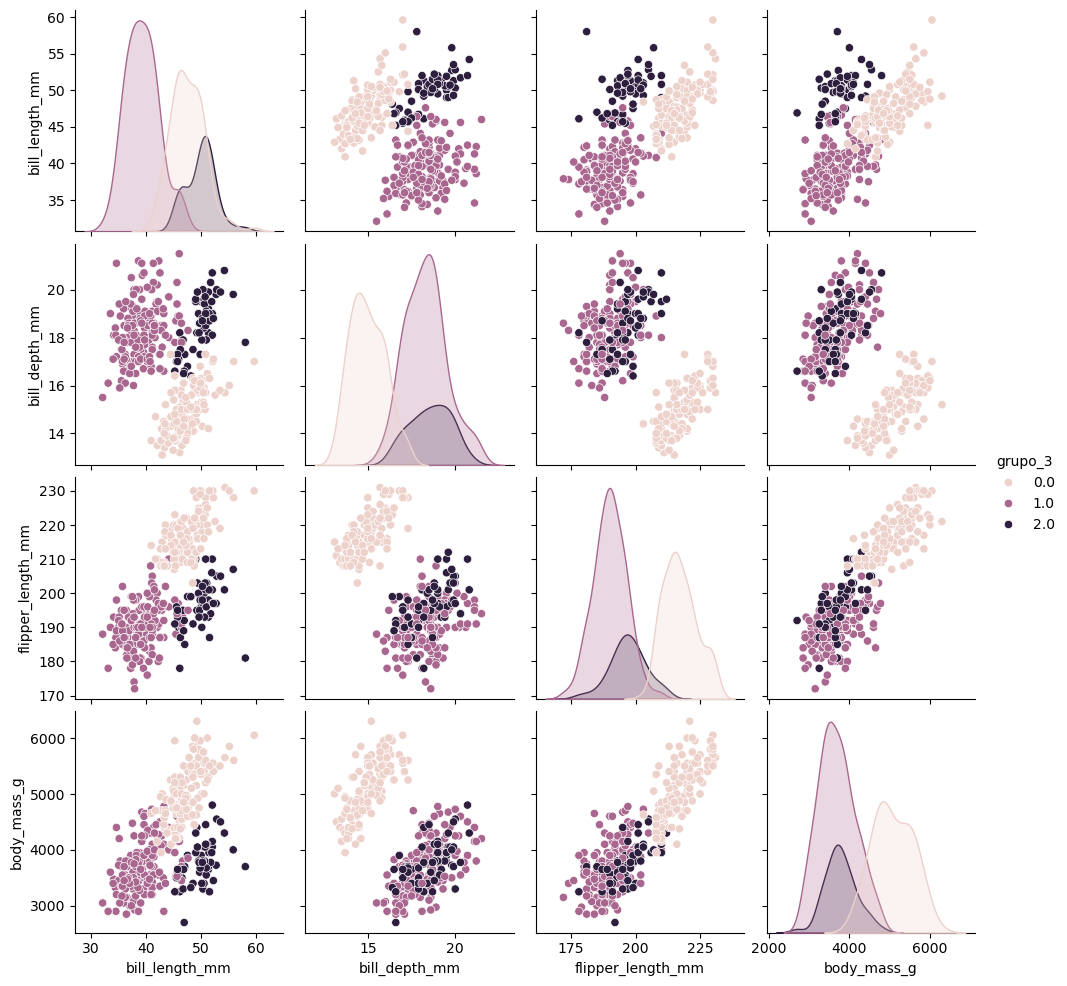

In [62]:
sns.pairplot(data=peng, hue='grupo_3')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.


In [92]:
#definindo o objeto de agrupamento
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=6)
#treinando o algoritmo
clus.fit(peng_pad)

# colocando grupo_5 no dataframe original
peng_num['grupo_6'] = clus.labels_
peng = peng.merge(peng_num['grupo_6'], how='left', on='id')
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_3,grupo_5_x,grupo_5_y,grupo_6
id,,,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,4.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,4.0,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,4.0,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0.0,3.0,3.0,3.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.0,1.0,0.0,0.0


- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?


In [95]:
#crosstab
pd.crosstab(peng['species'], peng['grupo_6'])

grupo_6,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [97]:
#crosstab
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'])

grupo_6           0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
   <strong>Resposta:</strong> <br>
   Sim. Os grupos estão divididos por espécie e sexo apesar de haver um pouco de ruído, principalmente no chinstrap.   
</div>